## the fft function
Let's make sure we're doing the fft with numpy correctly (i.e. it should agree with MatLab), but to how many decimal places?

In [27]:
import numpy as np
import sys
sys.path.append("D:/StanfordYearTwo/RCWA")
from convolution_matrices import convmat2D as cm


In [28]:
A = np.array([ 0.87494659,-0.73138314,0.87494659])

result = np.fft.fft(A,n=3)
print(result)
## appears to be agreement to a large number of decimal places

[1.01851004+0.j         0.80316487+1.39112235j 0.80316487-1.39112235j]


$$
ans = [1.018510040000000 + 0.000000000000000i, 
  0.803164865000000 + 1.391122353034198i, 
  0.803164865000000 - 1.391122353034198i]
$$

### in RCWA
In RCWA, for patterned layers, we can take an FFT

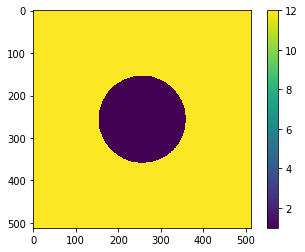

<class 'numpy.ndarray'>


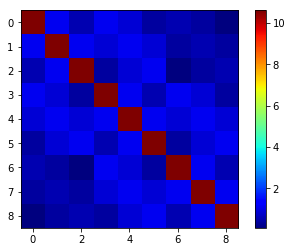

In [30]:
import matplotlib.pyplot as plt
## lattice and material parameters
a = 1;
radius = 0.2*a; #0.4;
e_r = 12;

#generate irreducible BZ sample
T1 = 2*np.pi/a;
T2 = 2*np.pi/a;

## Specify number of fourier orders to use:
N = 1; M = 1;
NM = (2*N+1)*(2*M+1);

# ============== build high resolution circle ==================
Nx = 512; Ny = 512;
A = e_r*np.ones((Nx,Ny));
ci = int(Nx/2); cj= int(Ny/2);
cr = (radius/a)*Nx;
I,J=np.meshgrid(np.arange(A.shape[0]),np.arange(A.shape[1]));

dist = np.sqrt((I-ci)**2 + (J-cj)**2);
A[np.where(dist<cr)] = 1;

#visualize structure
plt.imshow(A);
plt.colorbar();
plt.show()

## =============== Convolution Matrices ==============

## fft alone
Af = (1 / np.prod(N)) * np.fft.fftshift(np.fft.fft2(A));


E_r = cm.convmat2D(A, N,M)
print(type(E_r))
plt.figure();
plt.imshow(abs(E_r), cmap = 'jet');
plt.colorbar()
plt.show()

In [34]:
np.set_printoptions(precision = 8)
print(Af)

[[ -11.        +0.00000000e+00j    2.78795942-1.13686838e-13j
    54.49429876+0.00000000e+00j ... -179.77229926+1.43884904e-13j
    54.49429876+0.00000000e+00j    2.78795942+1.13686838e-13j]
 [   2.78795942-3.77054237e-16j  -19.87525009+6.25855302e-14j
    19.54104782+5.39070621e-14j ...   62.54158308-6.48181674e-14j
    19.54104782-6.24097146e-14j  -19.87525009-2.62828830e-14j]
 [  54.49429876-3.82805798e-15j   19.54104782+4.55334635e-14j
  -150.11657726-7.96018224e-14j ...  174.91110779-2.63467932e-14j
  -150.11657726+1.25818226e-13j   19.54104782-3.91610824e-14j]
 ...
 [-179.77229926-3.57932703e-14j   62.54158308+9.77834630e-14j
   174.91110779+5.46843590e-14j ... -306.47861514-1.16587254e-13j
   174.91110779-5.05109893e-15j   62.54158308-6.59190484e-14j]
 [  54.49429876+1.71368991e-14j   19.54104782+3.91610824e-14j
  -150.11657726-1.25818226e-13j ...  174.91110779-1.46240502e-15j
  -150.11657726+7.96018224e-14j   19.54104782-4.55334635e-14j]
 [   2.78795942-2.87799670e-15j  -19.875

Matlab answer AT LEAST agrees in terms of the magnitude (abs) but the real and imaginary parts do appear to have disagreement
ans =

   1.0e+02 *

  Column 1

 -0.110000000000000 + 0.000000000000000i  <br>
  0.027877494914885 + 0.000342125507580i <br>
  0.544778860922760 + 0.013373570389723i <br>

  Column 2

  0.027877494914876 + 0.000342125507579i <br>
 -0.198692640333564 - 0.004877630543374i <br>
  0.195278065014253 + 0.007192517034929i<br>

  Column 3

  0.544778860922757 + 0.013373570389724i <br>
  0.195278065014249 + 0.007192517034928i <br>
 -1.499357552702474 - 0.073658713242330i <br>